In [1]:
#Importing libraries
import re
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading csv
df = pd.read_csv('cars.csv' , header = 1)
df=df.rename(columns = {'Unnamed: 0':'Model'})

In [3]:
df.shape

(32316, 235)

In [4]:
df = df.replace("- TBD –", 'NA')
df = df.replace("- TBD -", 'NA')
df = df.replace("NA", np.nan)

In [5]:
#Number of missing values across columns

def missing_values(dataframe):
    null_counts = dataframe.isnull().sum()
    mean_missing = dataframe.isnull().mean()*100
    missing_val = pd.DataFrame({'Count' : null_counts[null_counts > 0] , 'Percentage Missing(%)' : mean_missing[mean_missing > 0] })
    missing_val.sort_values(by = 'Count' , inplace=True)
    missing_val.reset_index(inplace=True)
    missing_val.columns = ['Features' , 'Count' , 'Percentage Missing(%)' ]
    return missing_val
missing = missing_values(df)
missing

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Other Features,1700,5.260552
2,Body Style,1716,5.310063
3,Drivetrain,1716,5.310063
4,Disc - Front (Yes or ),1969,6.092957
5,Engine,1975,6.111524
6,Engine Type,1975,6.111524
7,Trans Type,1981,6.130090
8,Rear Wheel Material,1983,6.136279
9,Front Wheel Material,1983,6.136279


In [6]:
sel_cols =['Model' , 'MSRP' , 'EPA Fuel Economy Est - City (MPG)' , 'Engine' , 'EPA Classification',
           'Style Name','Drivetrain','Passenger Capacity' , 'Passenger Doors','Body Style','Transmission',
           'Base Curb Weight (lbs)' , 'Passenger Volume (ft³)' , 'Wheelbase (in)' , 'Track Width, Front (in)',
           'Height, Overall (in)' , 'Fuel Tank Capacity, Approx (gal)' , 'SAE Net Torque @ RPM',
           'Fuel System' , 'SAE Net Horsepower @ RPM' , 'Displacement' , 'Trans Description Cont.' , 
           'Trans Type' , 'Brake Type' , 'Steering Type' , 'Suspension Type - Front' ,
           'Suspension Type - Rear' , 'Air Bag-Frontal-Driver','Air Bag-Frontal-Passenger' ,
           'Air Bag-Passenger Switch (On/Off)' , 'Air Bag-Side Body-Front','Air Bag-Side Body-Rear' , 
           'Air Bag-Side Head-Front' , 'Air Bag-Side Head-Rear' , 'Brakes-ABS' , 
           'Child Safety Rear Door Locks' , 'Daytime Running Lights' , 'Traction Control' , 'Night Vision' ,
           'Rollover Protection Bars' , 'Fog Lamps' , 'Parking Aid' , 'Tire Pressure Monitor' , 'Back-Up Camera' ,
           'Stability Control' , 'Basic Miles/km' , 'Basic Years' , 'Corrosion Miles/km' ,'Corrosion Years' ,
           'Drivetrain Miles/km' , 'Drivetrain Years' , 'Turning Diameter - Curb to Curb (ft)'] 

**FEATURE DESCRIPTION**

1. Model - Car model names
2. MRSP  - Selling price in dollars
3. Engine - Type of engine used in car
4. EPA Classification - EPA size classes (Minicompact , Mid size , Compact , Mid-Size , SUV)
5. Style Name - Special features for each model (Drivetrain , Transmission , Roof , Doors , extra features)  ****
6. Drivetrain - Types of drivetrain(Conveys power from engine to wheels) used (FWD , RWD , AWD , 4WD )
7. Passenger Capacity - Number of people who can be seated
8. Passenger Doors - Number of doors in a car
9. Body Style - Body style of the car 
10. Transmission - Type of transmission used.  (Not req -- Trans type , Trans Description cont.)
11. Base Curb Weight - Total weight of the vehicle in pounds
12. Passenger Volumne - Volume of space available for passengers
13. Wheelbase - Distance between the centers of the front and rear wheels
14. Track Width Front - Distance between the centerline of two frontwheels
15. Height Overall - Overall height of the car in inches
16. Fuel Tank Capacity,Approx(gal) - Fuel tank capacity in gallon
17. SAE Net Torque @ RPM - Net optimum torque at certain range of RPM
18. Fuel System - Type of fuel injection used in car
19. SAE Net Horsepower @ RPM - Horsepower produced at engine crankshaft(without transmission losses)
20. Displacement -  Measure of the cylinder volume swept by all of the pistons (in litres)
21. Trans Description - Type of transmission used in car
22. Trans Type - Number of gears in transmission
23. Brake Type - Type of brake used in car
24. Steering type Front - Type of steering used in car front wheels
25. Steering type Rear - Type of steering used in car rear wheels
26. Air Bag Frontal Driver - Drivers Airbag(Y/N)
27. Air Bag Frontal Passenger - Front passenger Airbag(Y/N)
28. Air Bag-Side Body-Front - Airbags in front side of the car(Y/N)
29. Air Bag-Side Body-Rear - Airbags in rear side of the car(Y/N)
30. Air Bag Side Head-Front - Side airbags to protect head for front row(Y/N)
31. Air Bag Side Head-Rear  - Side airbags to protect head for rear row(Y/N)
32. Brakes -ABS - Is Antilock bracking system is present(Y/N)
33. Child Safety Rear Door Locks - Child safety door locks(Y/N)
34. Daytime Running Lights - (Y/N)
35. Traction Control - Is TCS available (Y/N)
36. Night Vision -  Thermographic camera to increase a driver's perception in darkness (Y/N)
37. Rollover Protection Bar - Is ROPS present (Y/N)
38. Fog Lamps - Is fog lamps present(Y/N)
39. Parking Aid - Senors to monitor nearby obstacles(Y/N)
40. Tire Pressure Monitor - Y/N
41. Back up Camera - Is reversing camera present (Y/N)
42. Stability Control - Is ECS present (Y/N)
43. Basic Miles/km - Warrany Kms
44. Basic Years - Warranty years
45. Corrosion Miles/km - Warranty against corrosion
46. Corrosion Years - Warranty against corrosion in years
47. Drivetrain Miles/Km - Warranty for drivetrain
48. Drivetrain Years - Warranty for drivetrain in years
49. Turning Diameter Curb to Curb(ft) -Diameter of the smallest circular turn by the car 

In [7]:
df1 = df[sel_cols]
df1.head()

,Model,MSRP,EPA Fuel Economy Est - City (MPG),Engine,EPA Classification,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Brake Type,Steering Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft)
0,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3790,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39
1,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3829,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3821,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39
3,2019 Acura RDX Specs: FWD,"$37,400",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3783,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39
4,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,4026,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39


In [8]:
missing_values(df1)

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Body Style,1716,5.310063
2,Drivetrain,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,Steering Type,2011,6.222924
6,SAE Net Horsepower @ RPM,2012,6.226018
7,Wheelbase (in),2015,6.235301
8,Brake Type,2035,6.297190
9,Trans Description Cont.,2037,6.303379


## DATA CLEANING

##### Model

In [9]:
df1['Manufacturer'] = df1['Model'].str.split(' ').str[1]     #Manufacturing Company
df1['Model year'] = df1['Model'].str.split(' ').str[0]       #Model year
df1.drop(columns='Model' , inplace  = True)

In [74]:
df1['Manufacturer'].replace({'Alfa':'Alfa Romeo' , 
                             'Aston':'Aston Martin',
                             'FIAT':'Fiat',
                             'INFINITI':'Infinit',
                             'Land':'Land Rover',
                             'MINI':'Mini',
                             'smart':'Smart'} , inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

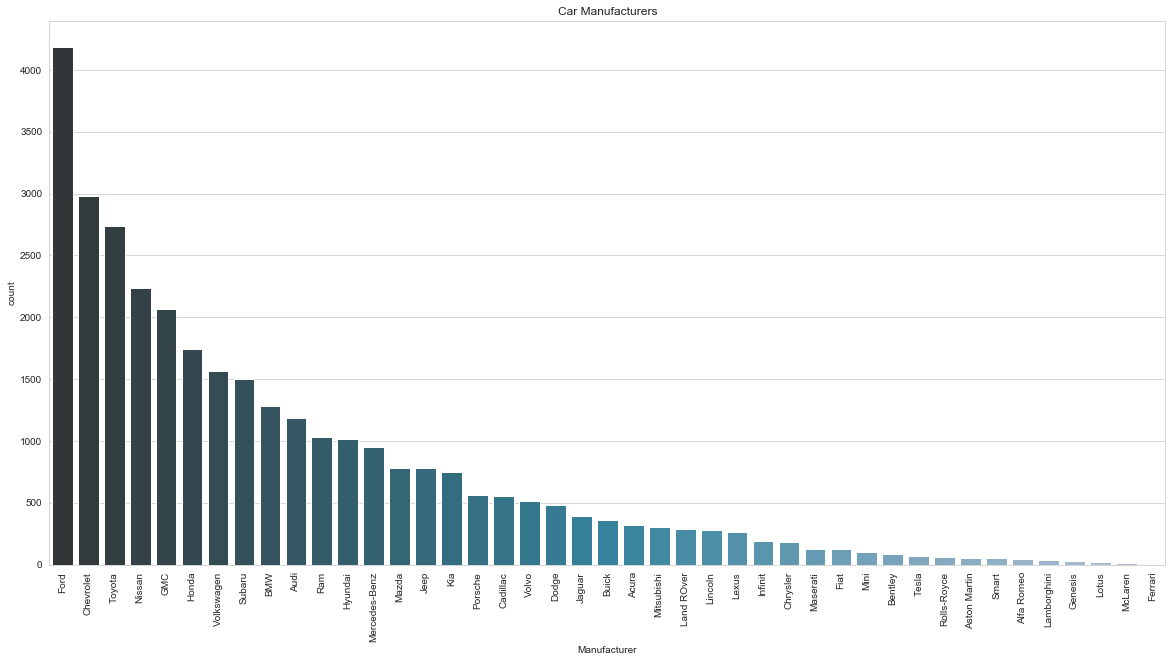

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
g = sns.countplot(
    data=df1,
    x='Manufacturer',
    order = df1['Manufacturer'].value_counts().index,
    palette='PuBuGn_d'
)
g.set_title('Car Manufacturers')
plt.xticks(rotation=90)

##### Price

In [12]:
df1['MSRP'] = df1['MSRP'].str.replace("$", "").str.replace(",", "").astype(float)

Text(0, 0.5, 'PDF')

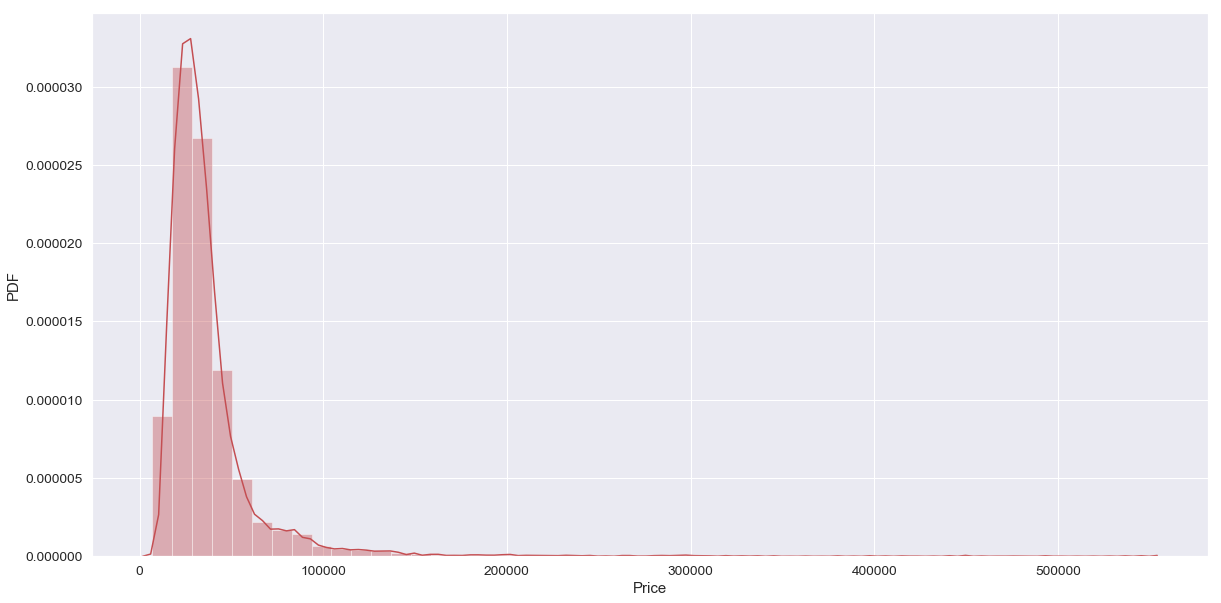

In [13]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['MSRP'].dropna(),color='r')
plt.xlabel('Price')
plt.ylabel('PDF')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

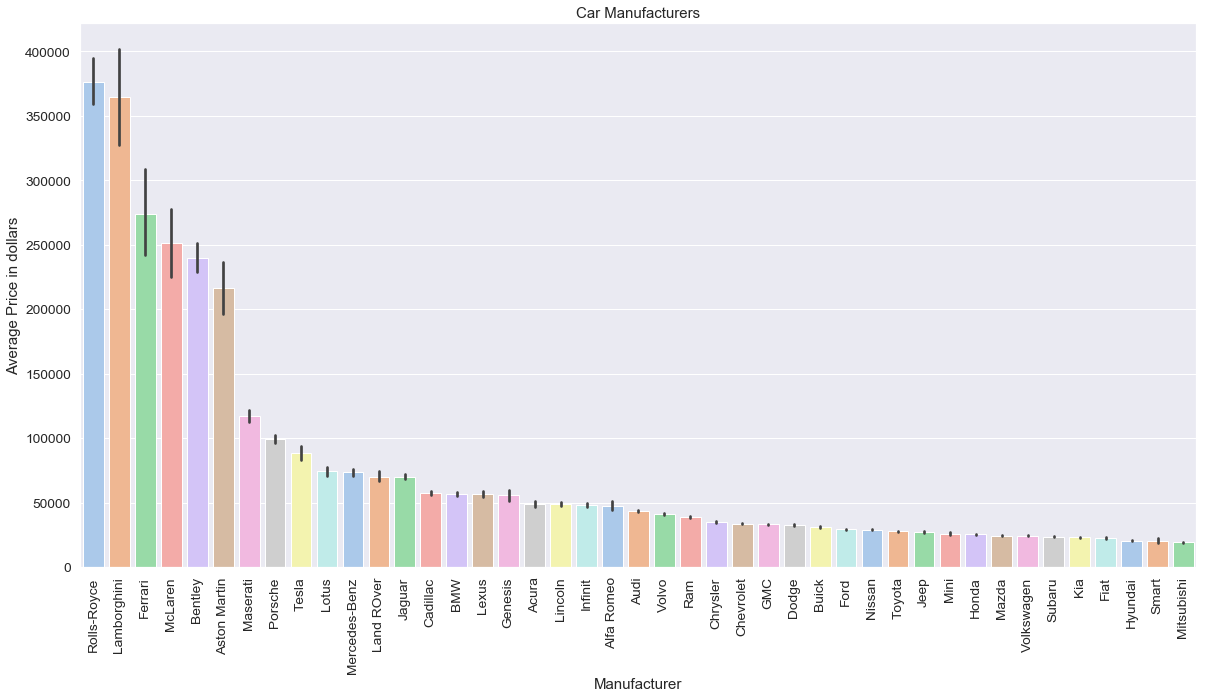

In [14]:
sns.set(font_scale=1.25)
plt.figure(figsize=(20,10))
g = sns.barplot(
    data=df1,
    x='Manufacturer',
    y='MSRP',
    order = df1.groupby(by = 'Manufacturer')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='pastel'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')
plt.xticks(rotation=90)

##### Engine

In [15]:
df1['Engine'] = df1['Engine'].str.split(',').str[0].str.split(' ').str[-1]

df1['Engine'].replace({'I-4':'l4','V-6':'V6','I4':'l4',
                       'V-12':'V12','V-8':'V8','I-5':'l5',
                       'I5':'l5','W-12':'W12','I-6':'l6',
                       '6-Cyl':'Flat','Cyl':'Flat','I-3':'l3',
                       'L4':'l4','Turbocharged':'l4','Gas':'l4',
                       '4-Cyl':'l4','5-Cyl':'l5','ECOTEC':'l4',
                       'Diesel':'l4','(Vortec)':'V8','I3':'l3',
                       'V-10':'V10','i4':'l4','4-cyl':'l4',
                       'H-6':'Flat','6':'Flat','6-cyl':'Flat',
                       'H-4':'Flat','4':'Flat','Electric/Gas':'Electric'}, inplace = True)

Text(0.5, 1.0, 'Engine Configuration')

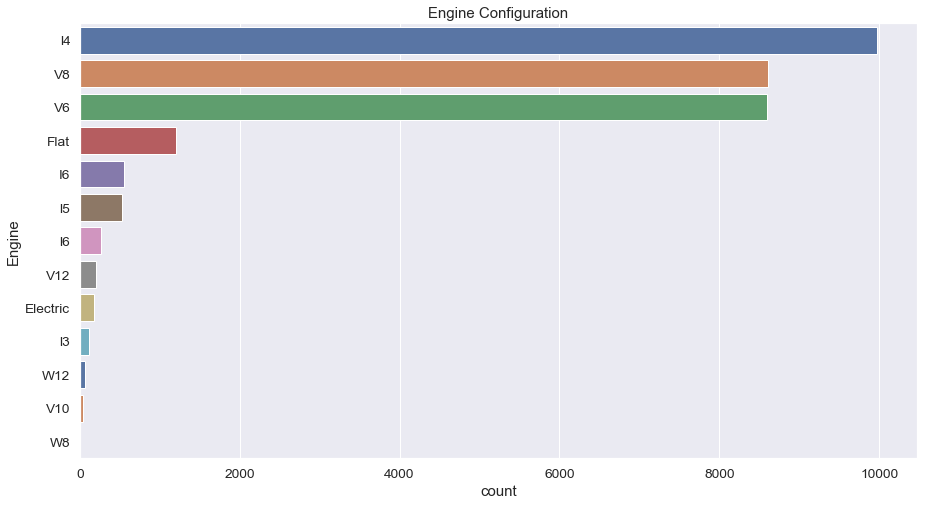

In [16]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,8))
g = sns.countplot(
    data=df1,
    y='Engine',
    order = df1['Engine'].value_counts().index,
    palette='deep'
)
g.set_title('Engine Configuration')


Text(0.5, 1.0, 'Car Manufacturers')

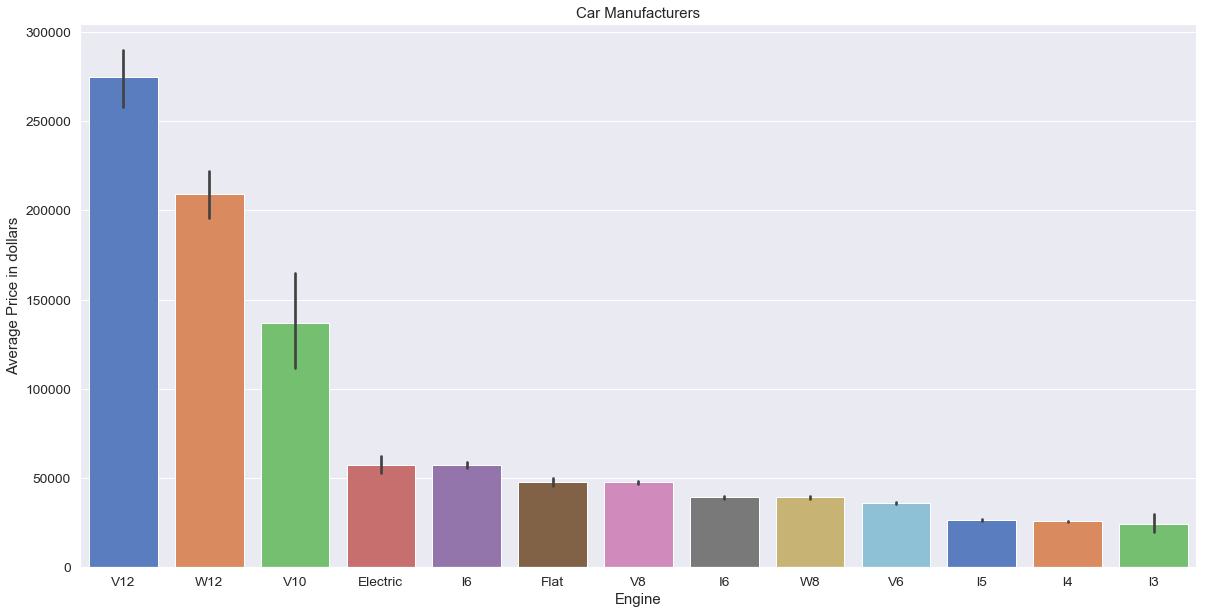

In [17]:
plt.figure(figsize=(20,10))
g = sns.barplot(
    data=df1,
    x='Engine',
    y='MSRP',
    order = df1.groupby(by = 'Engine')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

Text(0.5, 1.0, 'Boxplot between Engine type and price')

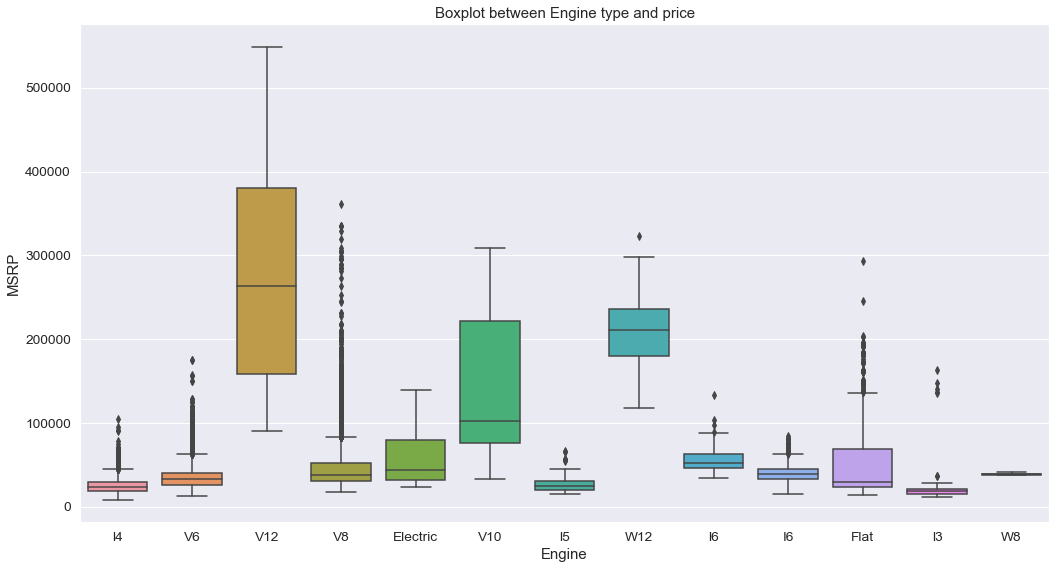

In [18]:
plt.figure(figsize=[15,8])
sns.boxplot(x='Engine' , y='MSRP',data=df1)
plt.tight_layout()
plt.title('Boxplot between Engine type and price')

#### Suspension

In [73]:
df['Suspension Type - Front'].value_counts()

Strut                               5347
Independent                         4971
MacPherson Strut                    4418
Double Wishbone                     3673
Torsion Bar                         1450
Coil Spring                         1155
MacPherson strut                     900
Independent Strut                    775
Multi-Link                           745
Short And Long Arm                   737
Double-Wishbone                      598
Coil                                 457
Coil springs                         286
Short/Long Arm                       259
Independent SLA                      238
Coil Springs                         217
Four-Link                            185
Double wishbone                      174
4-Link                               158
Other                                138
Indep Torsion Bar                    125
MacPherson                           123
Double Pivot                         122
Double-wishbone                      114
Leading Link    

In [20]:
df1['Suspension Type - Front'] = df['Suspension Type - Front']
#Suspension type Front

pattern1 = re.compile(r'(?i)(strut|MacPh|Mcpher)')                          #Strut
pattern2 = re.compile(r'(?i)(bone|short|sla|pivot|upper)')                  #Wishbone
pattern3 = re.compile(r'(?i)(tors|twis|crank|torq)')                        #Torsion bar
pattern4 = re.compile(r'(?i)(coil)')                                        #Coil spring
pattern5 = re.compile(r'(?i)(link|trap|control arm|multi|Trailing arm)')    #Link type
pattern6 = re.compile(r'(?i)(crank|solid|axle)')                            #Axle
pattern7 = re.compile(r'(?i)(leaf|stage|hotch|hypo)')                       #Leaf type
pattern8 = re.compile(r'(?i)(air)')                                         #Air suspension
pattern9 = re.compile(r'(?i)(indep|indpen|indep)')                          #Independent

df1['Suspension Type - Front'].fillna('NA',inplace = True)
df1['Suspension Type - Rear'].fillna('NA',inplace = True)

def suspension(x):
    if re.search(pattern1,x):
        return 'MacPherson Strut'
    elif re.search(pattern2,x):
        return 'Double Wishbone'
    elif re.search(pattern3,x):
        return 'Torsion Bar'
    elif re.search(pattern4,x):
        return 'Coil Spring'
    elif re.search(pattern5,x):
        return 'Link type'
    elif re.search(pattern6,x):
        return 'Axle'
    elif re.search(pattern7,x):
        return 'Leaf type'
    elif re.search(pattern8,x):
        return 'Air Suspension'
    elif re.search(pattern9,x):
        return 'Independent'
    else:
        return 'Others'

In [21]:
df1['Suspension Type - Front'] = df1['Suspension Type - Front'].apply(suspension)
df1['Suspension Type - Front'].value_counts()

MacPherson Strut    12220
Double Wishbone      6358
Independent          5051
Coil Spring          2463
Others               2440
Link type            1778
Torsion Bar          1662
Axle                  183
Leaf type             113
Air Suspension         48
Name: Suspension Type - Front, dtype: int64

In [22]:
df1['Suspension Type - Rear'] = df1['Suspension Type - Rear'].apply(suspension)
df1['Suspension Type - Rear'].value_counts()

Link type           17788
Leaf type            3020
Others               2595
Independent          2535
Double Wishbone      2490
Torsion Bar          1853
Coil Spring           718
MacPherson Strut      678
Axle                  577
Air Suspension         62
Name: Suspension Type - Rear, dtype: int64

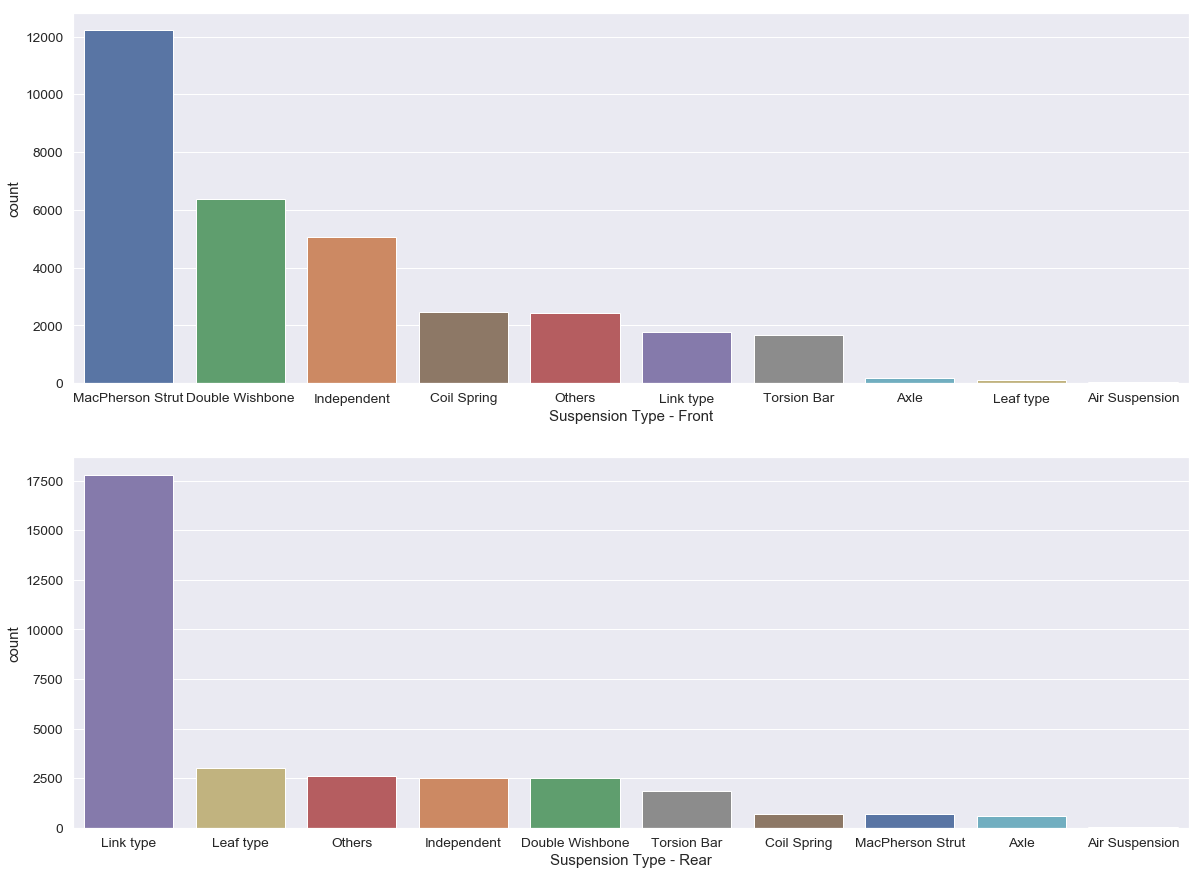

In [23]:
p = dict(zip(df1['Suspension Type - Front'].unique(), sns.color_palette()))
fig, ax =plt.subplots(2,1,figsize=(20,15))
sns.countplot(df1['Suspension Type - Front'],palette=p,order=df1['Suspension Type - Front'].value_counts().index ,ax=ax[0])
sns.countplot(df1['Suspension Type - Rear'],palette=p ,order=df1['Suspension Type - Rear'].value_counts().index ,ax=ax[1])

##### Fuel Economy

In [24]:
df1['EPA Fuel Economy Est - City (MPG)'] = df1['EPA Fuel Economy Est - City (MPG)'].str.split(' ').str[0].astype('float')

##### Curb Weight

In [25]:
df1['Base Curb Weight (lbs)'] = df1['Base Curb Weight (lbs)'].str.replace(',','').str.split(' ').str[0].str.split('-').str[0].astype('float')

##### Passenger Volume

In [26]:
df1['Passenger Volume (ft³)'] = df1['Passenger Volume (ft³)'].replace('-TBD-',np.NAN).astype('float')

##### Overall height

In [27]:
df1['Height, Overall (in)'] = df1['Height, Overall (in)'].str.split(' ').str[0].astype('float')

##### Fuel Capacity

In [28]:
df1['Fuel Tank Capacity, Approx (gal)'] = df1['Fuel Tank Capacity, Approx (gal)'].str.split(' ').str[0].astype('float')

#### Body Style

In [29]:
df1['Body Style'].replace('Crew Cab Pickup', 'Crew Cab Pickup - Standard Bed' , inplace = True)
df1['Body Style'].replace('Extended Cab Pickup', 'Extended Cab Pickup - Standard Bed' , inplace = True)
df1['Body Style'].replace('Regular Cab Chassis-Cab', 'Regular Cab Pickup - Standard Bed',inplace = True)
df1['Body Style'].replace('3dr Car' , 'Hatchback' , inplace = True)
df1['Body Style'].replace(['Crew Cab Pickup','Extended Cab Pickup'] , np.nan , inplace = True)


df1['Category'] = df1['Body Style']

van = ['Mini-van, Cargo', 'Full-size Passenger Van', 'Full-size Cargo Van', 'Mini-van, Passenger', 'Specialty Vehicle']

pickups = ['Crew Cab Pickup - Short Bed', 'Crew Cab Pickup - Standard Bed', 
        'Extended Cab Pickup - Short Bed', 'Extended Cab Pickup - Standard Bed',
        'Extended Cab Pickup - Long Bed', 'Regular Cab Pickup - Long Bed', 
        'Crew Cab Pickup - Long Bed', 'Regular Cab Pickup - Short Bed', 
        'Regular Cab Pickup - Standard Bed', 'Extended Cab Pickup', 'Crew Cab Pickup',
        'Regular Cab Chassis-Cab', 'Pickup - Short Bed', 'Pickup - Standard Bed', 'Pickup - Long Bed']

car = ['2dr Car', '4dr Car', 'Convertible', 'Station Wagon', '3dr Car', 'Hatchback']

df1['Category'] = df1['Category'].str.replace('Sport Utility', 'SUV')

for item in van:
    df1['Category'] = df1['Category'].str.replace(item, 'Van')
    
for item in pickups:
    df1['Category'] = df1['Category'].str.replace(item, 'Pickup')
    
for item in car:
    df1['Category'] = df1['Category'].str.replace(item, 'Car')

#### Drivetrain

In [30]:
df1['Drivetrain'].replace(['Front Wheel Drive', 'Front-Wheel Drive' , 
                           'Front wheel drive','Front-wheel drive' ,
                           '2 Wheel Drive' , '2WD' , '2-Wheel Drive'] , 'FWD' , inplace = True)
df1['Drivetrain'].replace(['Rear Wheel Drive' , 'REAR WHEEL DRIVE' , 
                           'Rear-Wheel Drive' ,'Rear wheel drive'] , 'RWD' , inplace = True)
df1['Drivetrain'].replace(['All Wheel Drive' , 'All-Wheel Drive' ,
                           'All wheel drive' , 'All-wheel drive' ] , 'AWD' , inplace = True)
df1['Drivetrain'].replace(['4 Wheel Drive' , 'Four Wheel Drive' , 
                           '4-Wheel Drive' , 'Four-Wheel Drive' , 
                           '4-wheel Drive' , 'Four wheel drive'] , '4WD' , inplace = True)

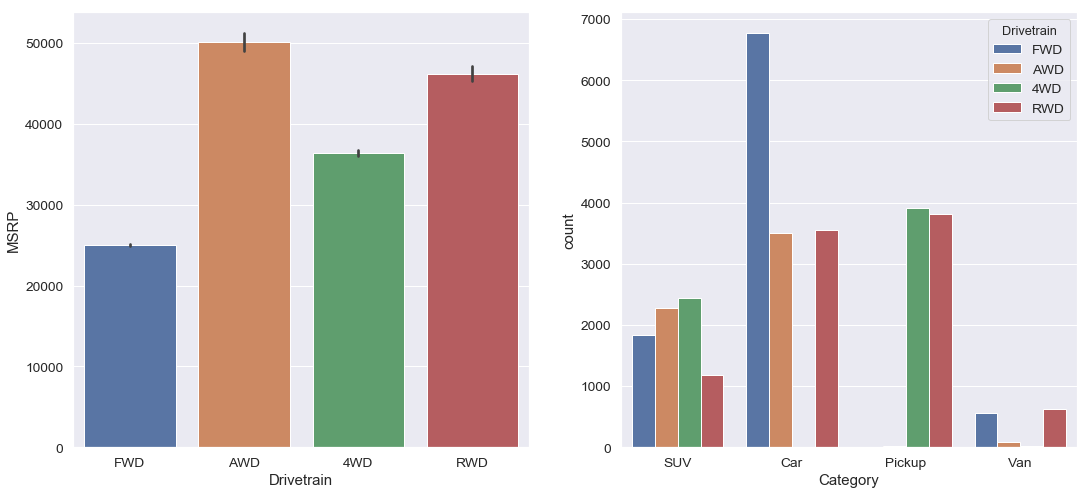

In [31]:
fig, ax =plt.subplots(1,2,figsize=(18,8))
sns.barplot(df1['Drivetrain'] , df1['MSRP'] , ax=ax[0])
sns.countplot(df1['Category'] , hue=df1['Drivetrain'] , ax=ax[1])

Text(0.5, 1.06, 'Boxplot between Price and Drivetrain types')

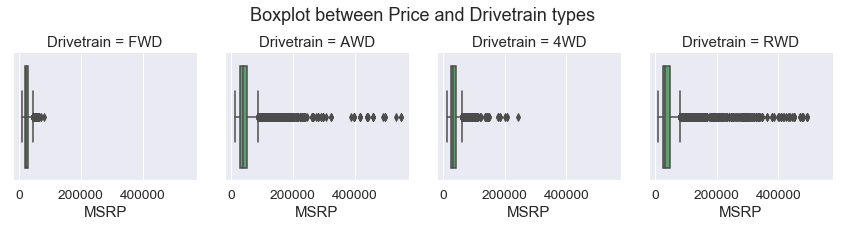

In [32]:
g = sns.FacetGrid(df1 , col='Drivetrain')
g.map(sns.boxplot , 'MSRP',color='g')
g.fig.suptitle('Boxplot between Price and Drivetrain types',y=1.06)

#### Number of gears

In [33]:
df1['Trans Type'].replace(10.0 , '10' , inplace = True)
df1['Trans Type'].replace(9.0 , '9' , inplace = True)
df1['Trans Type'].replace(8.0, '8' , inplace = True)
df1['Trans Type'].replace(7.0, '7' , inplace = True)
df1['Trans Type'].replace(['6.0' ,6.0, '6-speed' , 'Tiptronic'] , '6' , inplace = True)
df1['Trans Type'].replace(['5.0',5.0 , '5-speed','5-Speed' , 'HD 5'] , '5' , inplace = True)
df1['Trans Type'].replace(['4-Speed','4.0',4.0] , '4' , inplace = True)
df1['Trans Type'].replace(['4-Speed'] , '4' , inplace = True)
df1['Trans Type'].replace('2','<3',inplace = True)
df1['Trans Type'].replace('3','<3',inplace = True)
df1['Trans Type'].replace([1,'1'],'<3',inplace = True)

In [34]:
df1['Trans Type'].value_counts()

6      11449
5       7459
4       4663
8       3015
<3      1668
7       1379
9        487
10       193
CVT       22
Name: Trans Type, dtype: int64

In [35]:
#sns.swarmplot(x = df1['Trans Type'] ,y= df1['MSRP'])

#### Fuel System

In [36]:
#DI - Direct Injection , SFI - Sequential fuel injection ,EFI -  Electronic Fuel Injection
df1['Fuel System'].replace(['Gasoline Direct Injection' , 'Direct Injection' , 'Port/Direct Injection' , 
                            'Diesel Direct Injection' ,'NDIS', 'DI' , 'Direct Gasoline Injection' ,'MPFI' , 
                            'Turbocharged DI','FSI','SIDI','SMFI','Turbocharged SMPI','TDI', 
                            'TFSI Direct','Turbocharged','Direct injection','TFSI','GDI','SDI','Turbo-Diesel',
                            'Turbo-Charged OHV','FSI Direct','DOHC FSI Direct','Direct','DISI','SFI/DI'
                            'Turbocharged FSI','Turbo-Charged DI','CDI','Turbocharged FSI','FI','SFI/DI'
                            'NDIS','CRD','DIS','SFI/DI','SFI/DI','PFI','HPI'] , 'DI' , inplace = True)

df1['Fuel System'].replace(['Sequential MPI','SMPI','SEFI','MPI','MFI','SFI FlexFuel','Sequential MPI (injection)'
                            'Sequential Fuel Injection','SPI','SI','Sequential Fuel Injection',
                            'Supercharged SPFI','SMPFI','Sequential MPI (injection)'] , 'SFI' , inplace = True)

df1['Fuel System'].replace(['Electronic Fuel Injection','PGM-FI','Electronic fuel injection' , 
                            'Turbocharged EFI','EMPI','PGM-FI MPI','Supercharged EFI','FFV',
                            'Electronic Fuel Injectino','Electric','Hydrogen','Turbocharged EMFI','EFI',
                            'FFV','SPFI'] , 'Electric FI' , inplace = True)

In [37]:
df1['Fuel System'].value_counts()

SFI            12564
DI             10644
Electric FI     6278
Name: Fuel System, dtype: int64

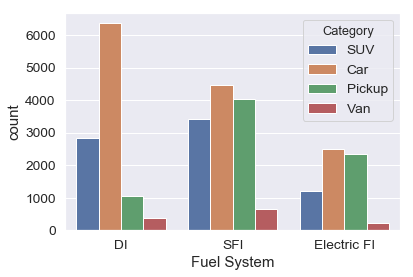

In [38]:
sns.countplot(df1['Fuel System'],hue=df1['Category'])

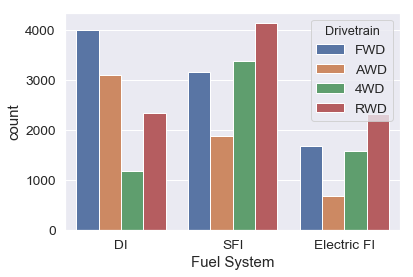

In [39]:
sns.countplot(df1['Fuel System'],hue=df1['Drivetrain'])

Text(0.5, 1.0, 'Car Manufacturers')

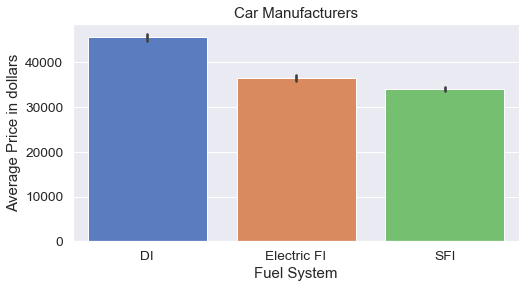

In [40]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Fuel System',
    y='MSRP',
    order = df1.groupby(by = 'Fuel System')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

#### Type of transmission

In [41]:
pattern1 = re.compile(r'(?i)(auto|hd auto|elec)')                                   #Automatic                   
pattern2 = re.compile(r'(?i)(man|hd man)')                                          #Manual               
pattern3 = re.compile(r'(?i)(cont|cvt|ECVT)')                                       #CVT
pattern4 = re.compile(r'(?i)(Automatic w/OD|Automatic|Auto w/OD|elec|tip|smg)')     #Automatic
pattern5 = re.compile(r'(?i)(Man|dsg|hd)')                                          #Manual

df1['Trans Description Cont.'].fillna('NA',inplace = True)

def transmission(x):
    if re.match(pattern2,x) or re.search(pattern5,x):
        return 'Manual'
    elif re.match(pattern1,x) or re.search(pattern4,x):
        return 'Automatic'
    elif re.match(pattern3,x):
        return 'CVT'
    else:
        return x
    
df1['Trans Description Cont.'] = df1['Trans Description Cont.'].apply(transmission)
df1['Trans Description Cont.'].value_counts()

Automatic    19086
Manual        9597
NA            2037
CVT           1596
Name: Trans Description Cont., dtype: int64

Text(0.5, 1.0, 'Car Manufacturers')

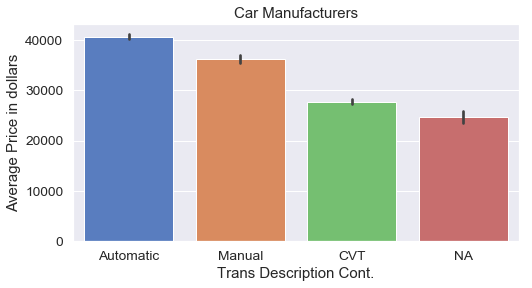

In [42]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Trans Description Cont.',
    y='MSRP',
    order = df1.groupby(by = 'Trans Description Cont.')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

#### Horsepower

In [43]:
#Net horsepower
df1['SAE Net Horsepower @ RPM'] = pd.to_numeric(df1['SAE Net Horsepower @ RPM'].str.split('@').str[0].str.split(' ').str[0],errors='coerce')

Text(0, 0.5, 'PDF')

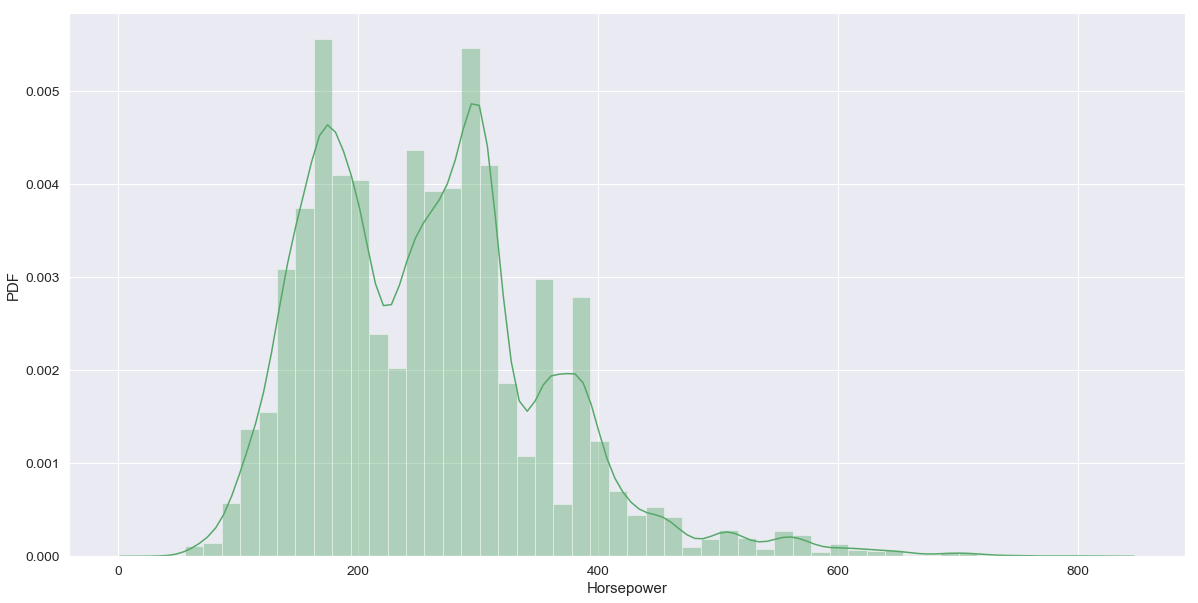

In [44]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['SAE Net Horsepower @ RPM'].dropna(),color='g')
plt.xlabel('Horsepower')
plt.ylabel('PDF')

Text(0.5, 1.05, 'Comparision between Horsepower and Price')

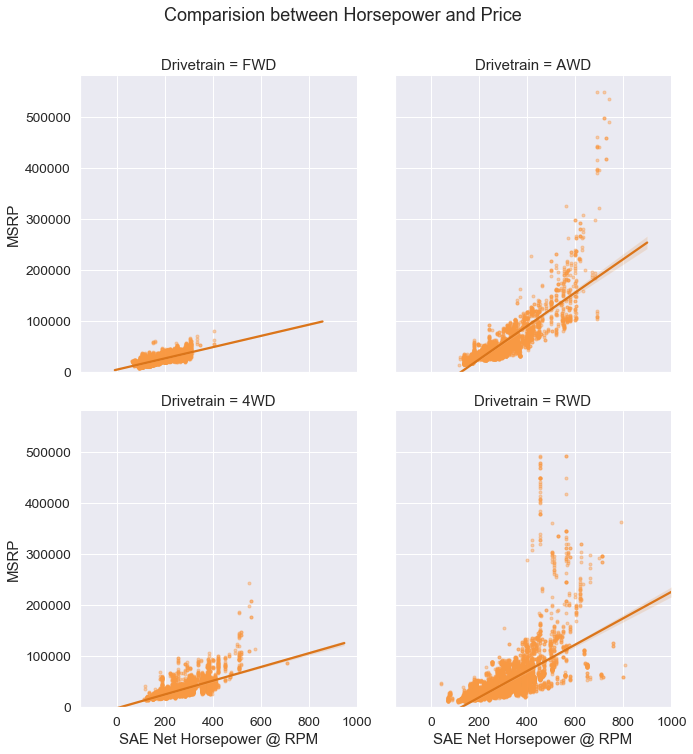

In [45]:
lm = sns.lmplot(x = 'SAE Net Horsepower @ RPM' , 
           y = 'MSRP' ,
           markers= '.',
           col = 'Drivetrain',
           col_wrap=2,
           palette='Blues',
           scatter_kws={'alpha':0.4, 'color':'#fa9943'},
           line_kws={'color': '#db751a'},
           data=df1)
lm.set(ylim=(0, None))
lm.fig.suptitle('Comparision between Horsepower and Price',y=1.05)

#### Torque

In [46]:
#Net Torque
df1['SAE Net Torque @ RPM'] = pd.to_numeric(df1['SAE Net Torque @ RPM'].str.split('@').str[0].str.split(' ').str[0], errors='coerce')

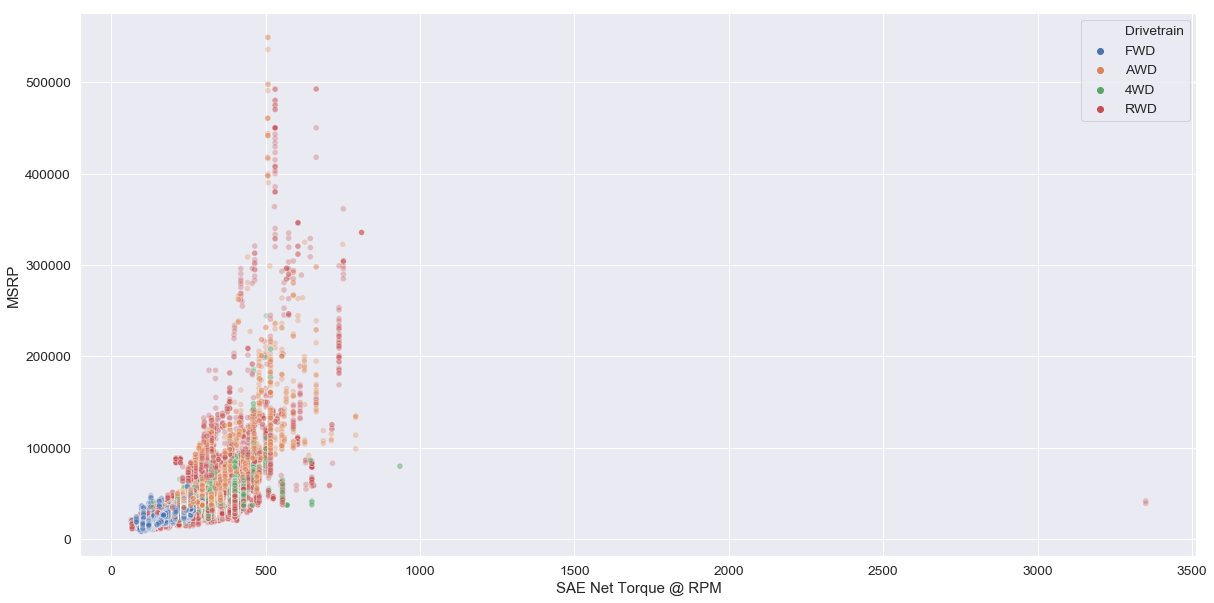

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

In [48]:
#Torque value above 1000 Nm is highly unlikely
df[df1['SAE Net Torque @ RPM'] > 1000][['Model','Engine','SAE Net Torque @ RPM']]

,Model,Engine,SAE Net Torque @ RPM
5725,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400
5726,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400


In [49]:
#Torque produced by Chevrolet Tahoe is around 460 Nm
df1['SAE Net Torque @ RPM'].replace(3350,460,inplace=True)

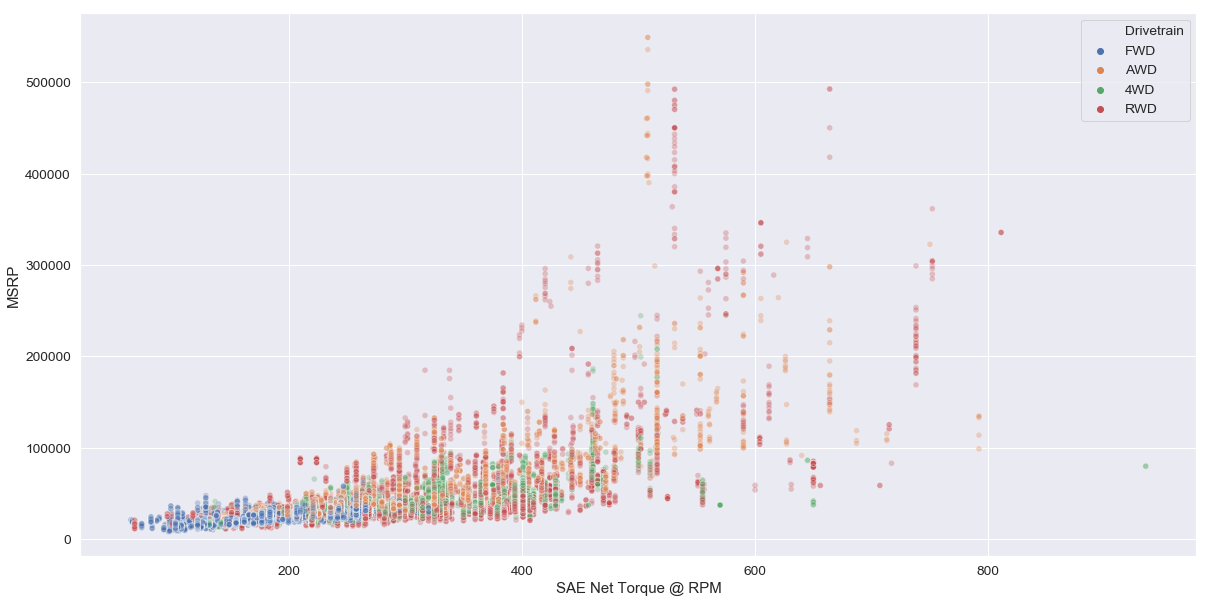

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

#### Displacement

In [51]:
df1['Displacement'] = pd.to_numeric(df1['Displacement'].str.strip(' ').str.split('L').str[0].str.split('/').str[0].str.split(' ').str[0]
                      ,errors='coerce')

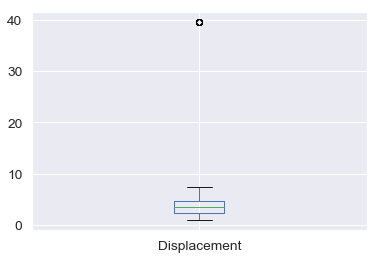

In [52]:
df1['Displacement'].plot(kind='box')

In [53]:
df[df1['Displacement'] > 8][['Engine','Displacement']]

,Engine,Displacement
2641,"Electric/Gas,",39.5 Cu.in. Range Extender
2642,"Electric/Gas,",39.5 Cu.in. Range Extender
2645,"Electric/Gas,",39.5 Cu.in. Range Extender
2646,"Electric/Gas,",39.5 Cu.in. Range Extender
2649,"Electric/Gas,",39.5 Cu.in. Range Extender
2651,"Electric/Gas,",39.5 Cu.in. Range Extender
2653,"Electric/Gas,",39.5 Cu.in. Range Extender


In [54]:
#BMW i3 is a hybrid car which has engine size of 650 cc
df1['Displacement'].replace(39.5,0.65,inplace=True)

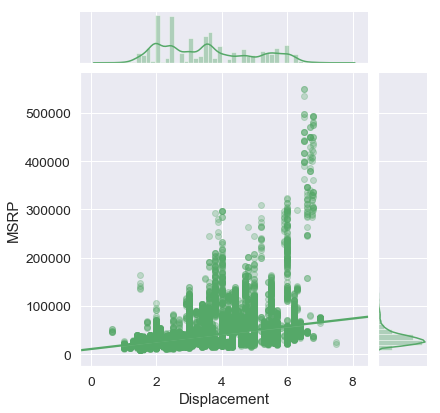

In [55]:
g = sns.jointplot(data=df1 , x = 'Displacement' , y = 'MSRP',kind='reg',color = 'g',
                 joint_kws = {'scatter_kws':dict(alpha=0.3)})

#### Turning Diamter

In [56]:
df1['Turning Diameter - Curb to Curb (ft)'] = pd.to_numeric(df1['Turning Diameter - Curb to Curb (ft)'].str.split(' ').str[0],
                                                            errors='coerce')

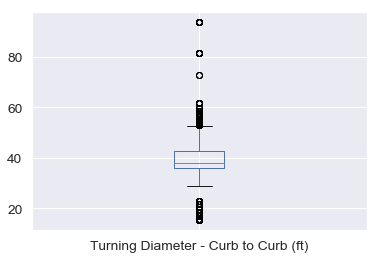

In [57]:
df1['Turning Diameter - Curb to Curb (ft)'].plot(kind='box')

In [58]:
#Outliers
df[(df1['Turning Diameter - Curb to Curb (ft)'] < 20) | (df1['Turning Diameter - Curb to Curb (ft)'] > 80)][['Model' , 'Turning Diameter - Curb to Curb (ft)']]

,Model,Turning Diameter - Curb to Curb (ft)
16428,2000 Hyundai Sonata Specs: 4-Door Sedan Automatic,17.25
16429,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16430,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16431,2000 Hyundai Sonata Specs: 4-Door Sedan Manual,17.25
16432,1999 Hyundai Sonata Specs: 99A 4-Door Sedan Au...,17.3
16433,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16434,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16435,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Ma...,17.3
16436,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Au...,17.3
16437,1999 Hyundai Sonata Specs: 99A 4-Door Sedan GL...,17.3


List of cars in which turning radius is given as turning diameter : 
    * Hyundai Sonata
    * Hyundai Accent
    * Kia Niro
    * Lexus LS
    * Mazda MAZDA3
    * Maxda MX-5

Since Ram ProMaster is a full size van it can have turning diamter above 80 feet 

In [59]:
df1['Turning Diameter - Curb to Curb (ft)'] = df1['Turning Diameter - Curb to Curb (ft)'].apply(lambda x: x*2 if x <20 else x)

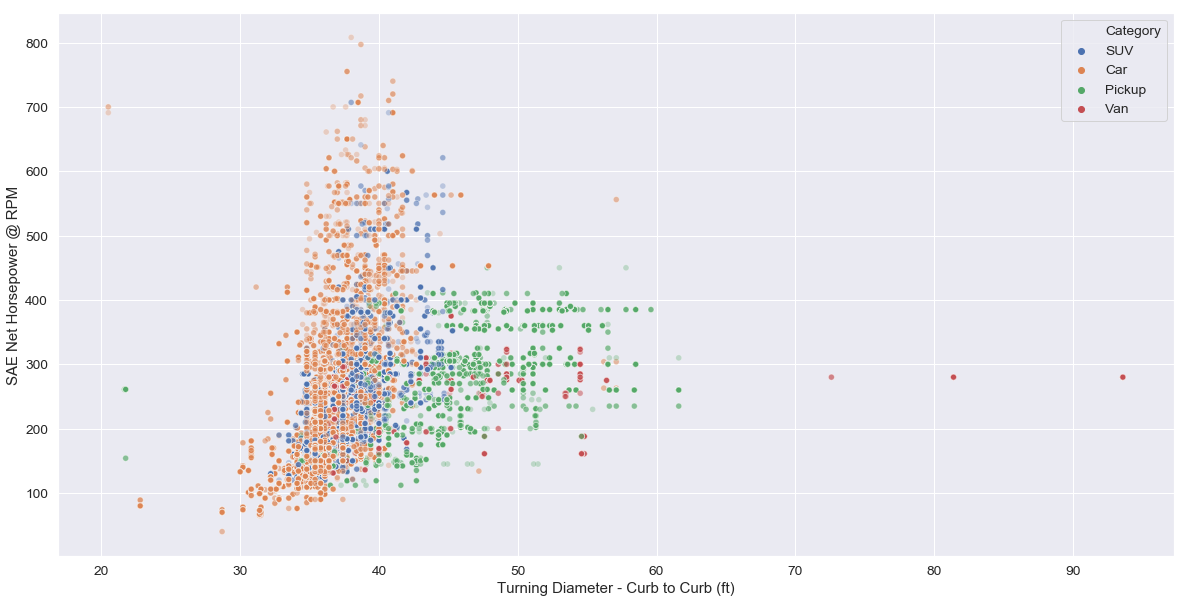

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['Turning Diameter - Curb to Curb (ft)'] , df1['SAE Net Horsepower @ RPM'],hue = df1['Category'] , alpha = 0.3)

In [61]:
y_n = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control']

for i in y_n:
    df1[i] = df1[i].map({'Yes':1 , 'No':0})

In [62]:
df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].astype(float)
df1['Corrosion Miles/km'].value_counts()

150000.0    20800
100000.0     7401
50000.0      1105
60000.0         6
Name: Corrosion Miles/km, dtype: int64

In [63]:
df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].astype(float)
df1['Drivetrain Miles/km'].value_counts()

60000.0     12771
100000.0     6519
50000.0      4927
36000.0      2928
70000.0      1587
150000.0      410
24000.0       227
72000.0       137
80000.0        10
62139.0         6
120000.0        5
125000.0        1
Name: Drivetrain Miles/km, dtype: int64

In [64]:
df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace("49999", "50000")
df1['Basic Miles/km'] = df1['Basic Miles/km'].astype(float)
df1['Basic Miles/km'].value_counts()

36000.0     19862
50000.0      7152
60000.0      2278
150000.0      290
24000.0       255
100000.0      214
72000.0       137
49711.0         6
42000.0         5
Name: Basic Miles/km, dtype: int64

In [65]:
df1['Drivetrain Years'] = df1['Drivetrain Years'].str.replace('Unlimited','20')

In [66]:
df1.drop(columns=['EPA Classification' , 'Style Name' ,'Body Style' ,'Transmission','Steering Type','Brake Type'],inplace = True)

In [67]:
df1.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Manufacturer,Model year,Category
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV


## MISSING VALUE IMPUTATION

In [68]:
missing_values(df1)

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Drivetrain,1716,5.310063
2,Category,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,SAE Net Horsepower @ RPM,2014,6.232207
6,Wheelbase (in),2015,6.235301
7,SAE Net Torque @ RPM,2067,6.396212
8,Basic Years,2117,6.550935
9,Basic Miles/km,2117,6.550935


In [69]:
#Dropping Rows where price is not available
df1['MSRP'].dropna(axis=0,how='all',inplace= True)

In [70]:
df1.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Manufacturer,Model year,Category
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Acura,2019,SUV


In [71]:
#df1.to_csv('cars_cleaned.csv',index=False)

In [72]:
#Categorical columns that needs to be imputed
# Horsepower,Wheelbase,torque,displacement,height,fuel tank capacity,turning dia, fuel economy , trackwidh , curb wt , pass volume
cat_col_imp = ['Drivetrain' , 'Category' , 'Engine' , 'Trans Type' , 'Basic Years' , 'Basic Miles/km',
               'Corrosion Years' , 'Corrosion Miles/km']